<a href="https://colab.research.google.com/github/Ravindra1972/Anaytics-in-finance-using-Python/blob/main/Derivative_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from math import exp, log, pi

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-12-396ae016052c>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def norm_pdf(x):
    return (1.0/((2*pi)**0.5))*exp(-0.5*x*x)

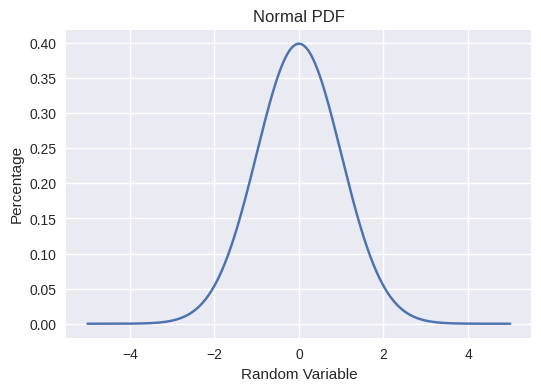

In [3]:
norm_pdf_dist = []
loop = []
for i in range(0,10000):
    j = i/1000 - 5
    loop.append(j)
    norm_pdf_dist.append(norm_pdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_pdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal PDF")
plt.show()

In [4]:
def norm_cdf(x):
    k = 1.0/(1.0+0.2316419*x)
    k_sum = k * (0.319381530 + k * (-0.356563782 + \
        k * (1.781477937 + k * (-1.821255978 + 1.330274429 * k))))

    if x >= 0.0:
        return (1.0 - (1.0 / ((2 * pi)**0.5)) * exp(-0.5 * x * x) * k_sum)
    else:
        return 1.0 - norm_cdf(-x)

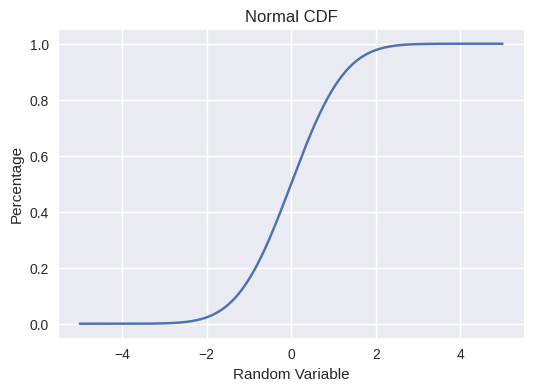

In [5]:
norm_cdf_dist = []
loop_cdf = []
for i in range(0,10000):
    j = i/1000 - 5
    loop_cdf.append(j)
    norm_cdf_dist.append(norm_cdf(j))

plt.subplots(figsize=(6,4))
ax = sns.lineplot(x=loop, y=norm_cdf_dist)
ax.set(xlabel="Random Variable", ylabel="Percentage", title="Normal CDF")
plt.show()


In [6]:
def d_j(j, S, K, r, v, T):
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))

In [7]:
def vanilla_call_price(S, K, r, v, T):
    return S * norm_cdf(d_j(1, S, K, r, v, T)) - \
        K*exp(-r*T) * norm_cdf(d_j(2, S, K, r, v, T))

def vanilla_put_price(S, K, r, v, T):
    return -S * norm_cdf(-d_j(1, S, K, r, v, T)) + \
        K*exp(-r*T) * norm_cdf(-d_j(2, S, K, r, v, T))

In [8]:
VCP = vanilla_call_price(100, 100, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 100, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 0.00010000667828080623
Put Price: 6.728288662327664e-09


In [9]:
VCP = vanilla_call_price(100, 50, 0.0000001, 0.0000001, 10)
VPP = vanilla_put_price(100, 50, 0.0000001, 0.0000001, 10)

print('Call Price: {}'.format(VCP))
print('Put Price: {}'.format(VPP))

Call Price: 50.000049999975
Put Price: 0.0


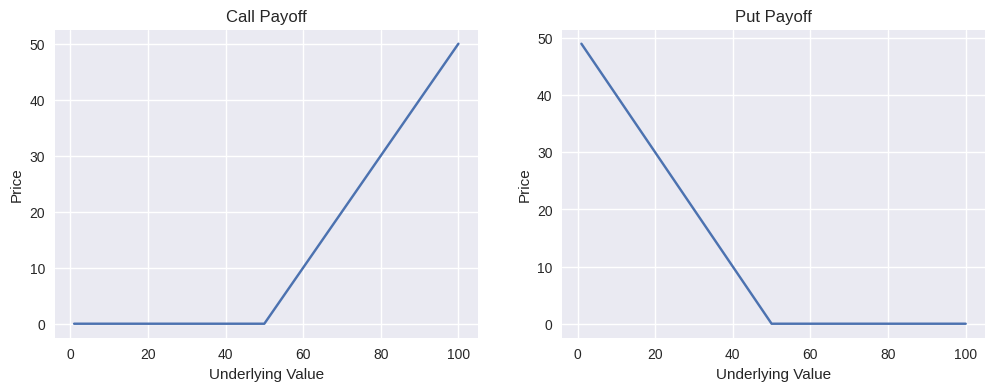

In [15]:
call_payoff = []
put_payoff = []
loop = []
for i in range(1,101):
    loop.append(i)
    call_payoff.append(vanilla_call_price(i, 50, 0.0000001, 0.0000001, 10))
    put_payoff.append(vanilla_put_price(i, 50, 0.0000001, 0.0000001, 10))

fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.lineplot(x=loop, y=call_payoff, ax=ax[0])
sns.lineplot(x=loop, y=put_payoff, ax=ax[1])
ax[0].set(title="Call Payoff", xlabel="Underlying Value", ylabel="Price")
ax[1].set(title="Put Payoff", xlabel="Underlying Value", ylabel="Price")
plt.show()

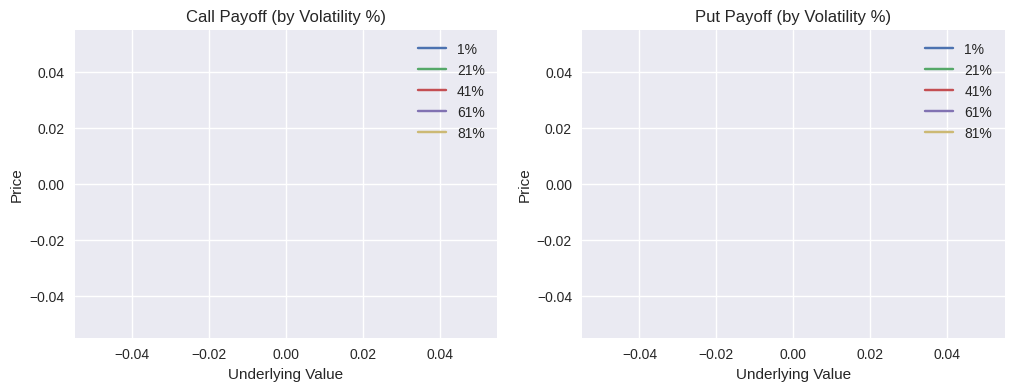

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_call = pd.DataFrame([])
df_put = pd.DataFrame([])
loop = range(1,101)
for v in range(1,101,20):
    sigma = v/100
    df_call_t = pd.DataFrame({'{}%'.format(v): []})
    df_put_t = pd.DataFrame({'{}%'.format(v): []})

# Initialize empty DataFrames
df_call = pd.DataFrame()
df_put = pd.DataFrame()
loop = range(1, 101)

for v in range(1, 101, 20):
    sigma = v / 100
    df_call_t = pd.DataFrame(columns=['{}%'.format(v)])  # Initialize with columns
    df_put_t = pd.DataFrame(columns=['{}%'.format(v)])   # Initialize with columns

    for i in range(1, 101):
        df_call_t.loc[i] = vanilla_call_price(i, 50, 0.0000001, sigma, 10)
        df_put_t.loc[i] = vanilla_put_price(i, 50, 0.0000001, sigma, 10)

    df_call = pd.concat([df_call, df_call_t], axis=1)  # Concatenate along columns
    df_put = pd.concat([df_put, df_put_t], axis=1)     # Concatenate along columns
# Ensure data in df_call and df_put is numeric
df_call = df_call.apply(pd.to_numeric, errors='coerce')
df_put = df_put.apply(pd.to_numeric, errors='coerce')

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for i in range(5):
    sns.lineplot(x=loop, y=df_call.iloc[:, i], label=df_call.columns[i], ax=ax[0])
    sns.lineplot(x=loop, y=df_put.iloc[:, i], label=df_put.columns[i], ax=ax[1])
    ax[0].set(title="Call Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[1].set(title="Put Payoff (by Volatility %)", xlabel="Underlying Value", ylabel="Price")
    ax[0].legend()
    ax[1].legend()
plt.show()
